# Prueba _Z_ y la proporción de ventas después de un nuevo _banner_
En el cuaderno anterior prometí que profundizaríamos un poco en el uso de la prueba _z_. Hoy vamos a usar la prueba _Z_, explicaremos en qué circunstancias se trata de una prueba robusta y cuáles son sus principales diferencias con la prueba _t_ de Student y la prueba _U_ de _Mann-Whitney_. Tenemos la información de ventas en un sitio web a través de un nuevo _banner_. Analizaremos si la proporción de ventas entre dos grupos es distinta. Es decir, pondremos a prueba la idea de que el _banner_ ha sido exitoso.

## Diferencias entre la prueba _z_, la prueba _t_ y la prueba _u_
Antes de continuar hagamos una breve comparación entre las pruebas a través de una tabla e identifiquemos las diferencias.
| Prueba                   | ¿Qué compara?                | Supuestos principales                                        | Tipo           |
|--------------------------|------------------------------|--------------------------------------------------------------|----------------|
| Prueba Z                 | Medias o proporciones        | Muestras grandes (>30), datos normales                       | Paramétrica    |
| Prueba t de Student      | Medias                       | Muestras pequeñas, datos normales, varianza conocida (o similar) | Paramétrica    |
| Prueba U de Mann-Whitney | Distribuciones (rango)       | No requiere normalidad, compara rangos                       | No paramétrica |

- Solamente la prueba _U_ no es paramétrica (funciona con distribuciones no normales) y compara rangos.
- La prueba _Z_ es robusta ante muestras grandes y la prueba _t_ es robusta con pruebas pequeñas.
- La prueba _U_ compara distribuciones (es decir, mira toda la distribución y la tendencia, no sólo la media o proporción).

## Problema a resolver y librerías
Como decíamos, tenemos dos grupos de usuarios que vieron un _banner_ diferente en una tienda online. Vamos a comprobar si el _banner_ b genera más compras exitosas.

El grupo A tuvo 280 éxitos (conversión, compras) de 2600 usuarios y el grupo B tuvo 40 éxitos de 900 usuarios. Importemos las librerías necesarias

In [1]:
# Pandas, NumPy y stats.
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

Preparemos los datos con `NumPy`. Crearemos matrices con los datos clave.

In [2]:
éxitos = np.array([280, 40]) # El múmero de compras.
total = np.array([2600, 900]) # El número de usuarios.

## Ejecución de la prueba _Z_ e interpretación
Ya que tenemos los datos necesarios en las matrices que hicimos, podemos ejecutar nuestra prueba _Z_.

In [3]:
# Ejecuta la prueba Z para comparar las dos proporciones.)
zstat, pval = proportions_ztest(
    count=éxitos,         # Vector con el número de éxitos.
    nobs=total,           # Vector con el total de observaciones en cada grupo.
    alternative='two-sided'  # Especifica que buscamos diferencias en ambos sentidos.
)

# Muestra el estadístico Z, que indica cuántas desviaciones estándar separan ambas proporciones.
print(f'Estadístico Z: {zstat:.2f}')

# Muestra el valor p, que indica la probabilidad de obtener una diferencia por azar.
print(f'Valor p: {pval:.4f}')


Estadístico Z: 5.67
Valor p: 0.0000


Es valor `Estadístico Z` indica cuántas desviaciones estándar separan ambas proporciones. Es una diferencia grande. Además el valor p es muchísimo menor a 0.05. Eso quiere decir que la diferencia entre grupos es significativa a nivel estadístico. Vamos a imprimirlo a través de una estructura de control.

In [4]:
alpha = 0.05
if pval < alpha:
    print("Hay diferencia estadísticamente significativa entre los grupos.")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos.")


Hay diferencia estadísticamente significativa entre los grupos.


## Explicación y visualización
Podemos concluir que hay una diferencia estadísticamente significativa entre las proporciones de los _banners_. El _banner_ b sirve. 

Entonces recuerda: si tienes muestras grandes, tus datos son independientes y las proporciones representar tasas o probabilidades, la prueba _Z_ es una buena opción.

Vamos a graficar la diferencia entre proporciones.

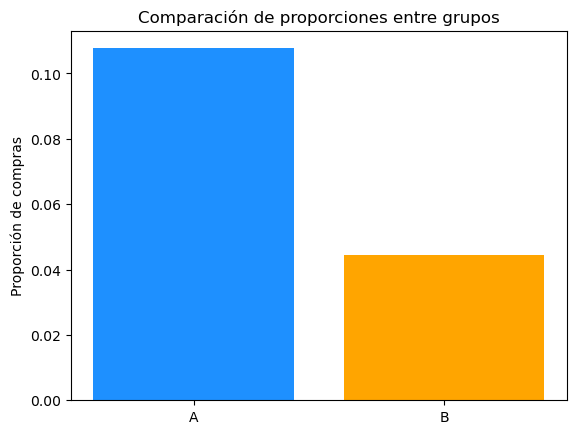

In [5]:
import matplotlib.pyplot as plt

plt.bar(['A', 'B'], éxitos/total, color=['dodgerblue', 'orange'])
plt.ylabel('Proporción de compras')
plt.title('Comparación de proporciones entre grupos')
plt.show()


## Conclusión
El método o prueba _Z_ es directo y robusto para mostrar si los cambios entre dos tasas son realmente distintos y no solo ruido. Pero recuerda revisar los supuestos: muestras grandes y aleatorias.

¿Qué veremos en el próximo cuaderno? Ojalá lo supiera. Jaja. Hasta entonces.